In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
%matplotlib notebook

In [12]:
mean = 0.0
std = 1
num_samples = 1000
ninstances = 100
Allsamples = np.zeros((num_samples,ninstances))
for i in range(ninstances):
    samples = np.random.normal(mean, std, size=num_samples)
    Allsamples[:,i] = samples

# plt.figure(0)
# for i in range(ninstances):
#     plt.plot(Allsamples[:,i])

<IPython.core.display.Javascript object>


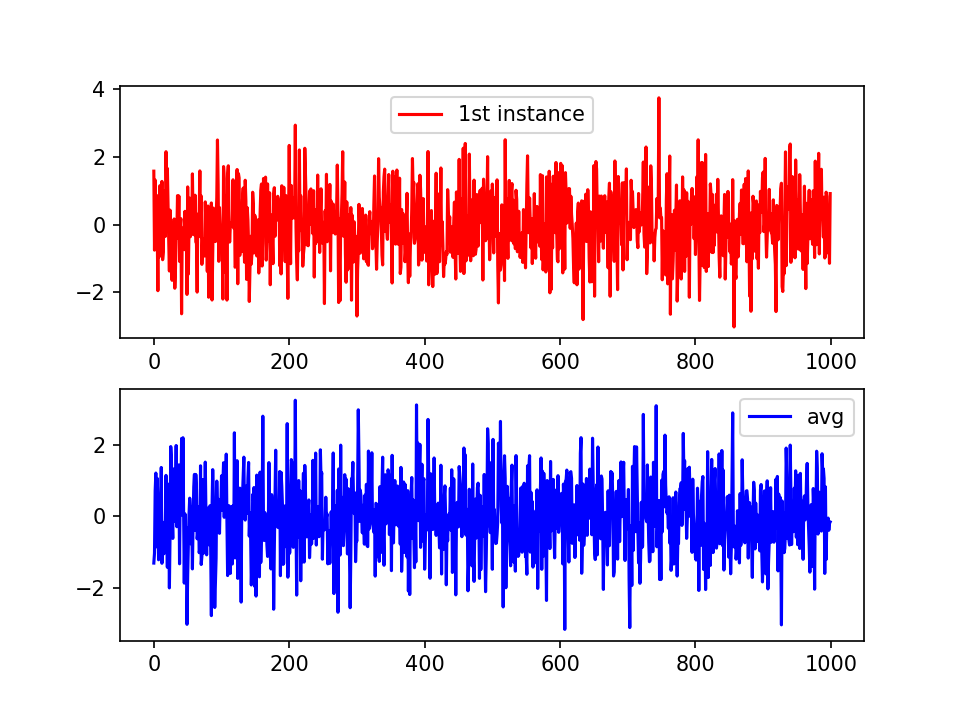

In [19]:
avgsample = np.average(Allsamples,axis=1)
plt.figure(0)

plt.subplot(211)
plt.plot(Allsamples[:,0],label='1st instance',color='red')
plt.legend()

plt.subplot(212)
plt.plot(avgsample*ninstances**.5,label='avg',color='blue')
plt.legend()

/Users/nesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


<IPython.core.display.Javascript object>


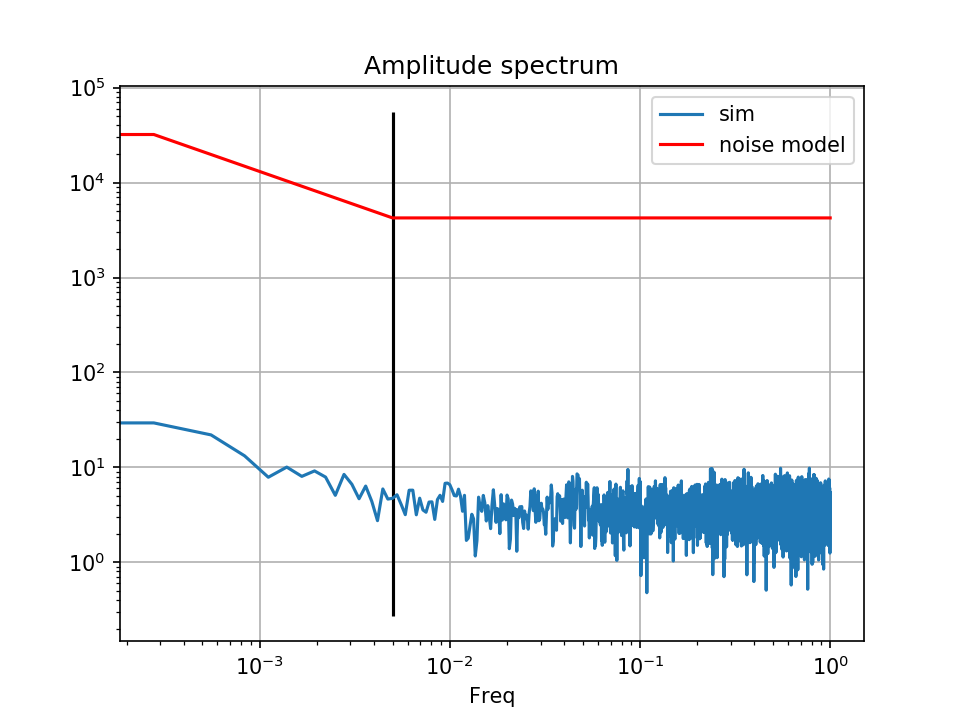

In [21]:
#downloaded from https://gist.github.com/zonca/979729 
from matplotlib import mlab

def one_over_f(f, knee, alpha):
    desc = np.ones_like(f)
    desc[f<KNEE] = np.abs((f[f<KNEE]/KNEE)**(-alpha))
    desc[0] = 1
    return desc

white_noise_sigma =  3 #mK * sqrt(s)

SFREQ = 2 #Hz
KNEE = 5 / 1e3 #Hz
ALPHA = .7
N = SFREQ * 3600 * 2 # 4 hours

#generate white noise in time domain
wn=np.random.normal(0.,white_noise_sigma*np.sqrt(SFREQ),N)

#shaping in freq domain
s = np.fft.rfft(wn)
f = np.fft.fftfreq(N, d=1./SFREQ)[:len(s)]
f[-1]=np.abs(f[-1])
fft_sim = s * one_over_f(f, KNEE, ALPHA)
T_sim = np.fft.irfft(fft_sim)

#PSD - 1 hour window
NFFT = int(SFREQ*60*60*1)
s_sim, f_sim  = mlab.psd(T_sim, NFFT=NFFT, Fs=SFREQ, scale_by_freq=True)

#plot
plt.figure()
plt.plot(f_sim, np.sqrt(s_sim), label='sim')
plt.loglog(f_sim, one_over_f(f_sim, KNEE, ALPHA) * white_noise_sigma*1e3*np.sqrt(2), 'r',label='noise model')
plt.vlines(KNEE,*plt.ylim())
plt.grid(); plt.xlabel('Freq'); plt.title('Amplitude spectrum'); plt.legend()